In [1]:
import pandas as pd #pandas for data
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
from scipy import stats #for t-test
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared

In [2]:
data=pd.read_excel("Student_data (1).xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
StudentID      395 non-null int64
school2        395 non-null object
sex            395 non-null object
age            395 non-null int64
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null 

In [4]:
data.head()

,StudentID,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [5]:
data.isnull().sum()

StudentID      0
school2        0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Final_Grade    0
dtype: int64

In [6]:
print(data.duplicated().any())

False


In [12]:
data["Final_Grade_1"]=data.Final_Grade+0.001

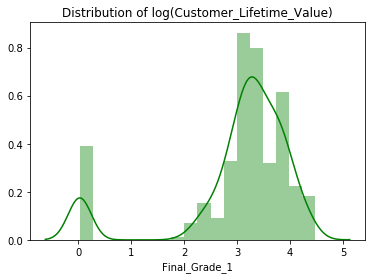

In [14]:
sns.distplot(np.sqrt(data.Final_Grade_1),color="green")
plt.title("Distribution of log(Customer_Lifetime_Value)")
plt.show()  

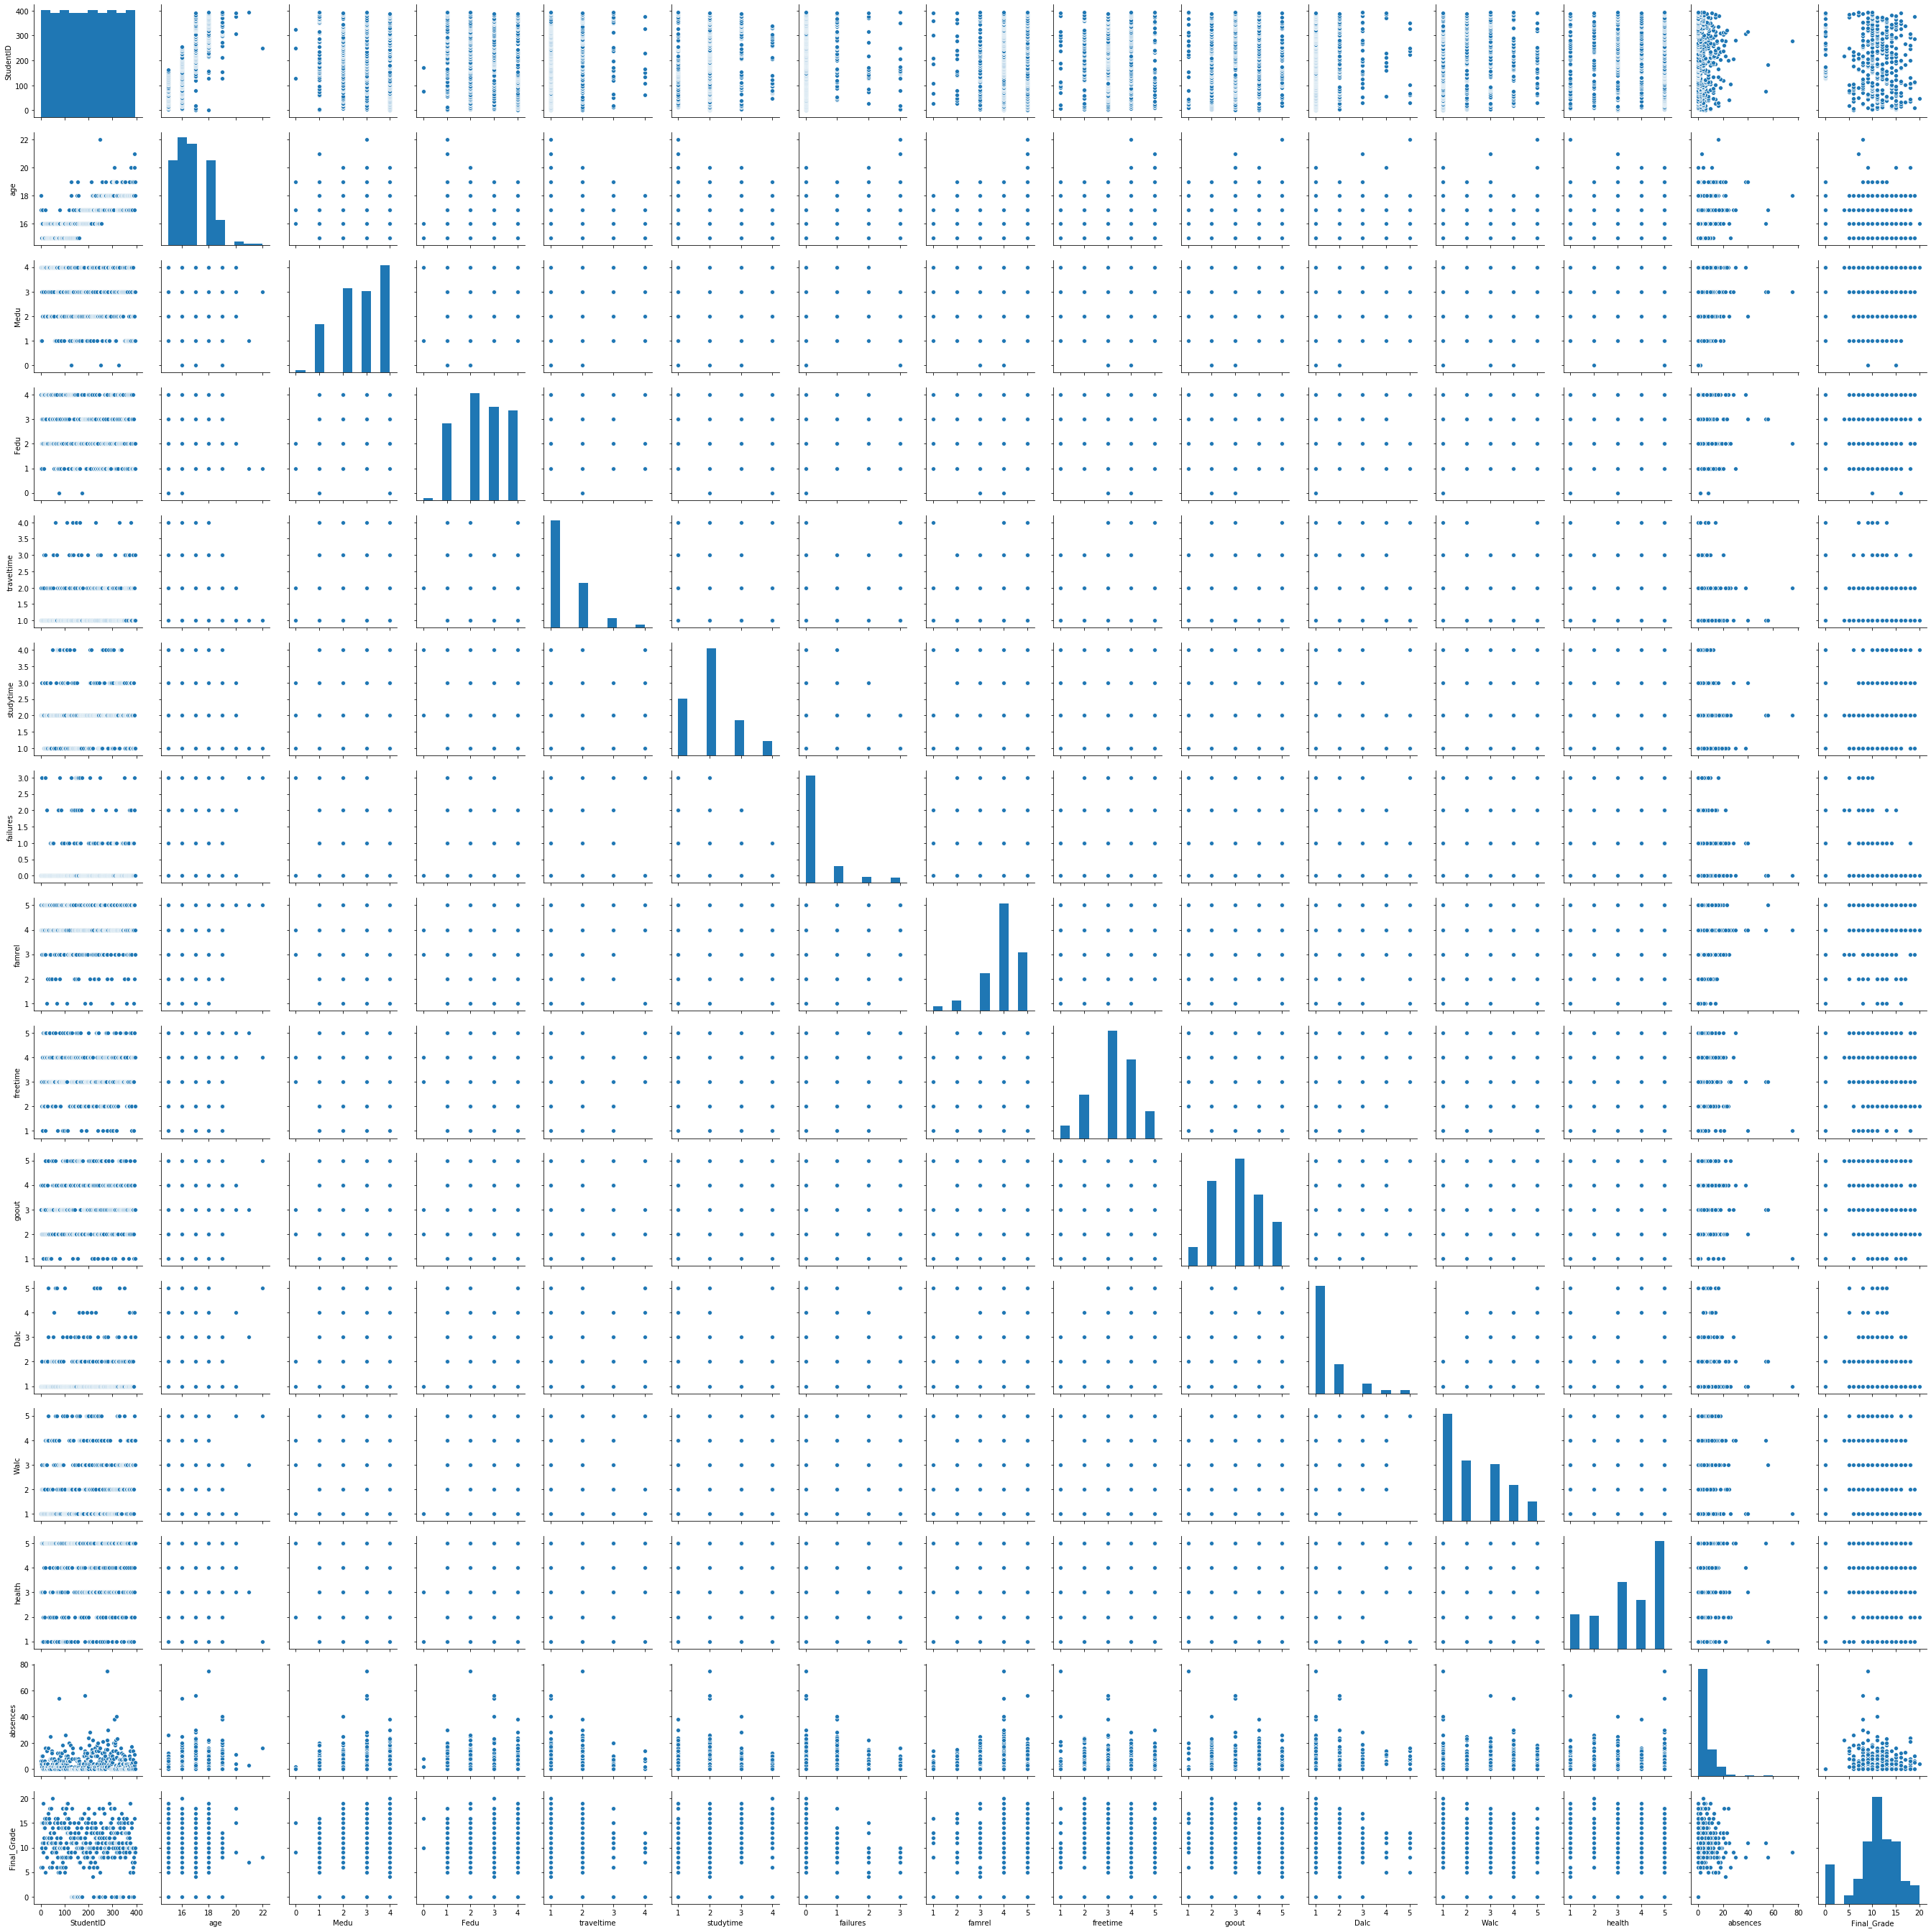

In [117]:
sns.pairplot(data)

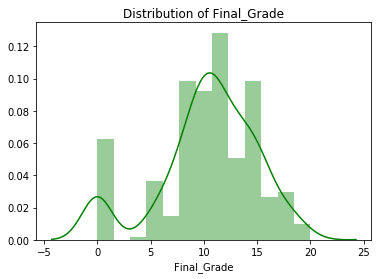

In [118]:
sns.distplot(data.Final_Grade,color="green")
plt.title("Distribution of Final_Grade")
plt.show()

In [119]:
data_numeric = data.select_dtypes(exclude=["object"])

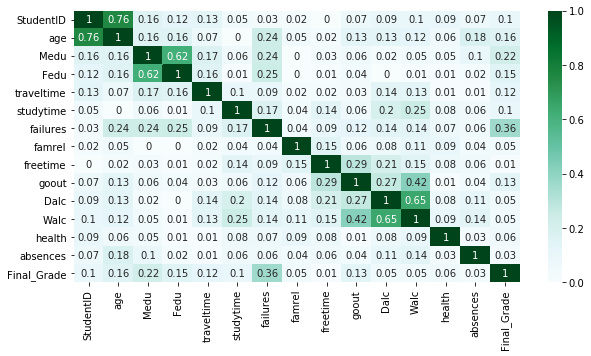

In [120]:
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "BuGn")

In [121]:
data.drop(["StudentID","age"],axis=1,inplace=True) #firstly, I remove these columns as I think they don't affect Final_Grade

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school2        395 non-null object
sex            395 non-null object
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null int64
goout          395 non-null int64
Dalc           395 non-null 

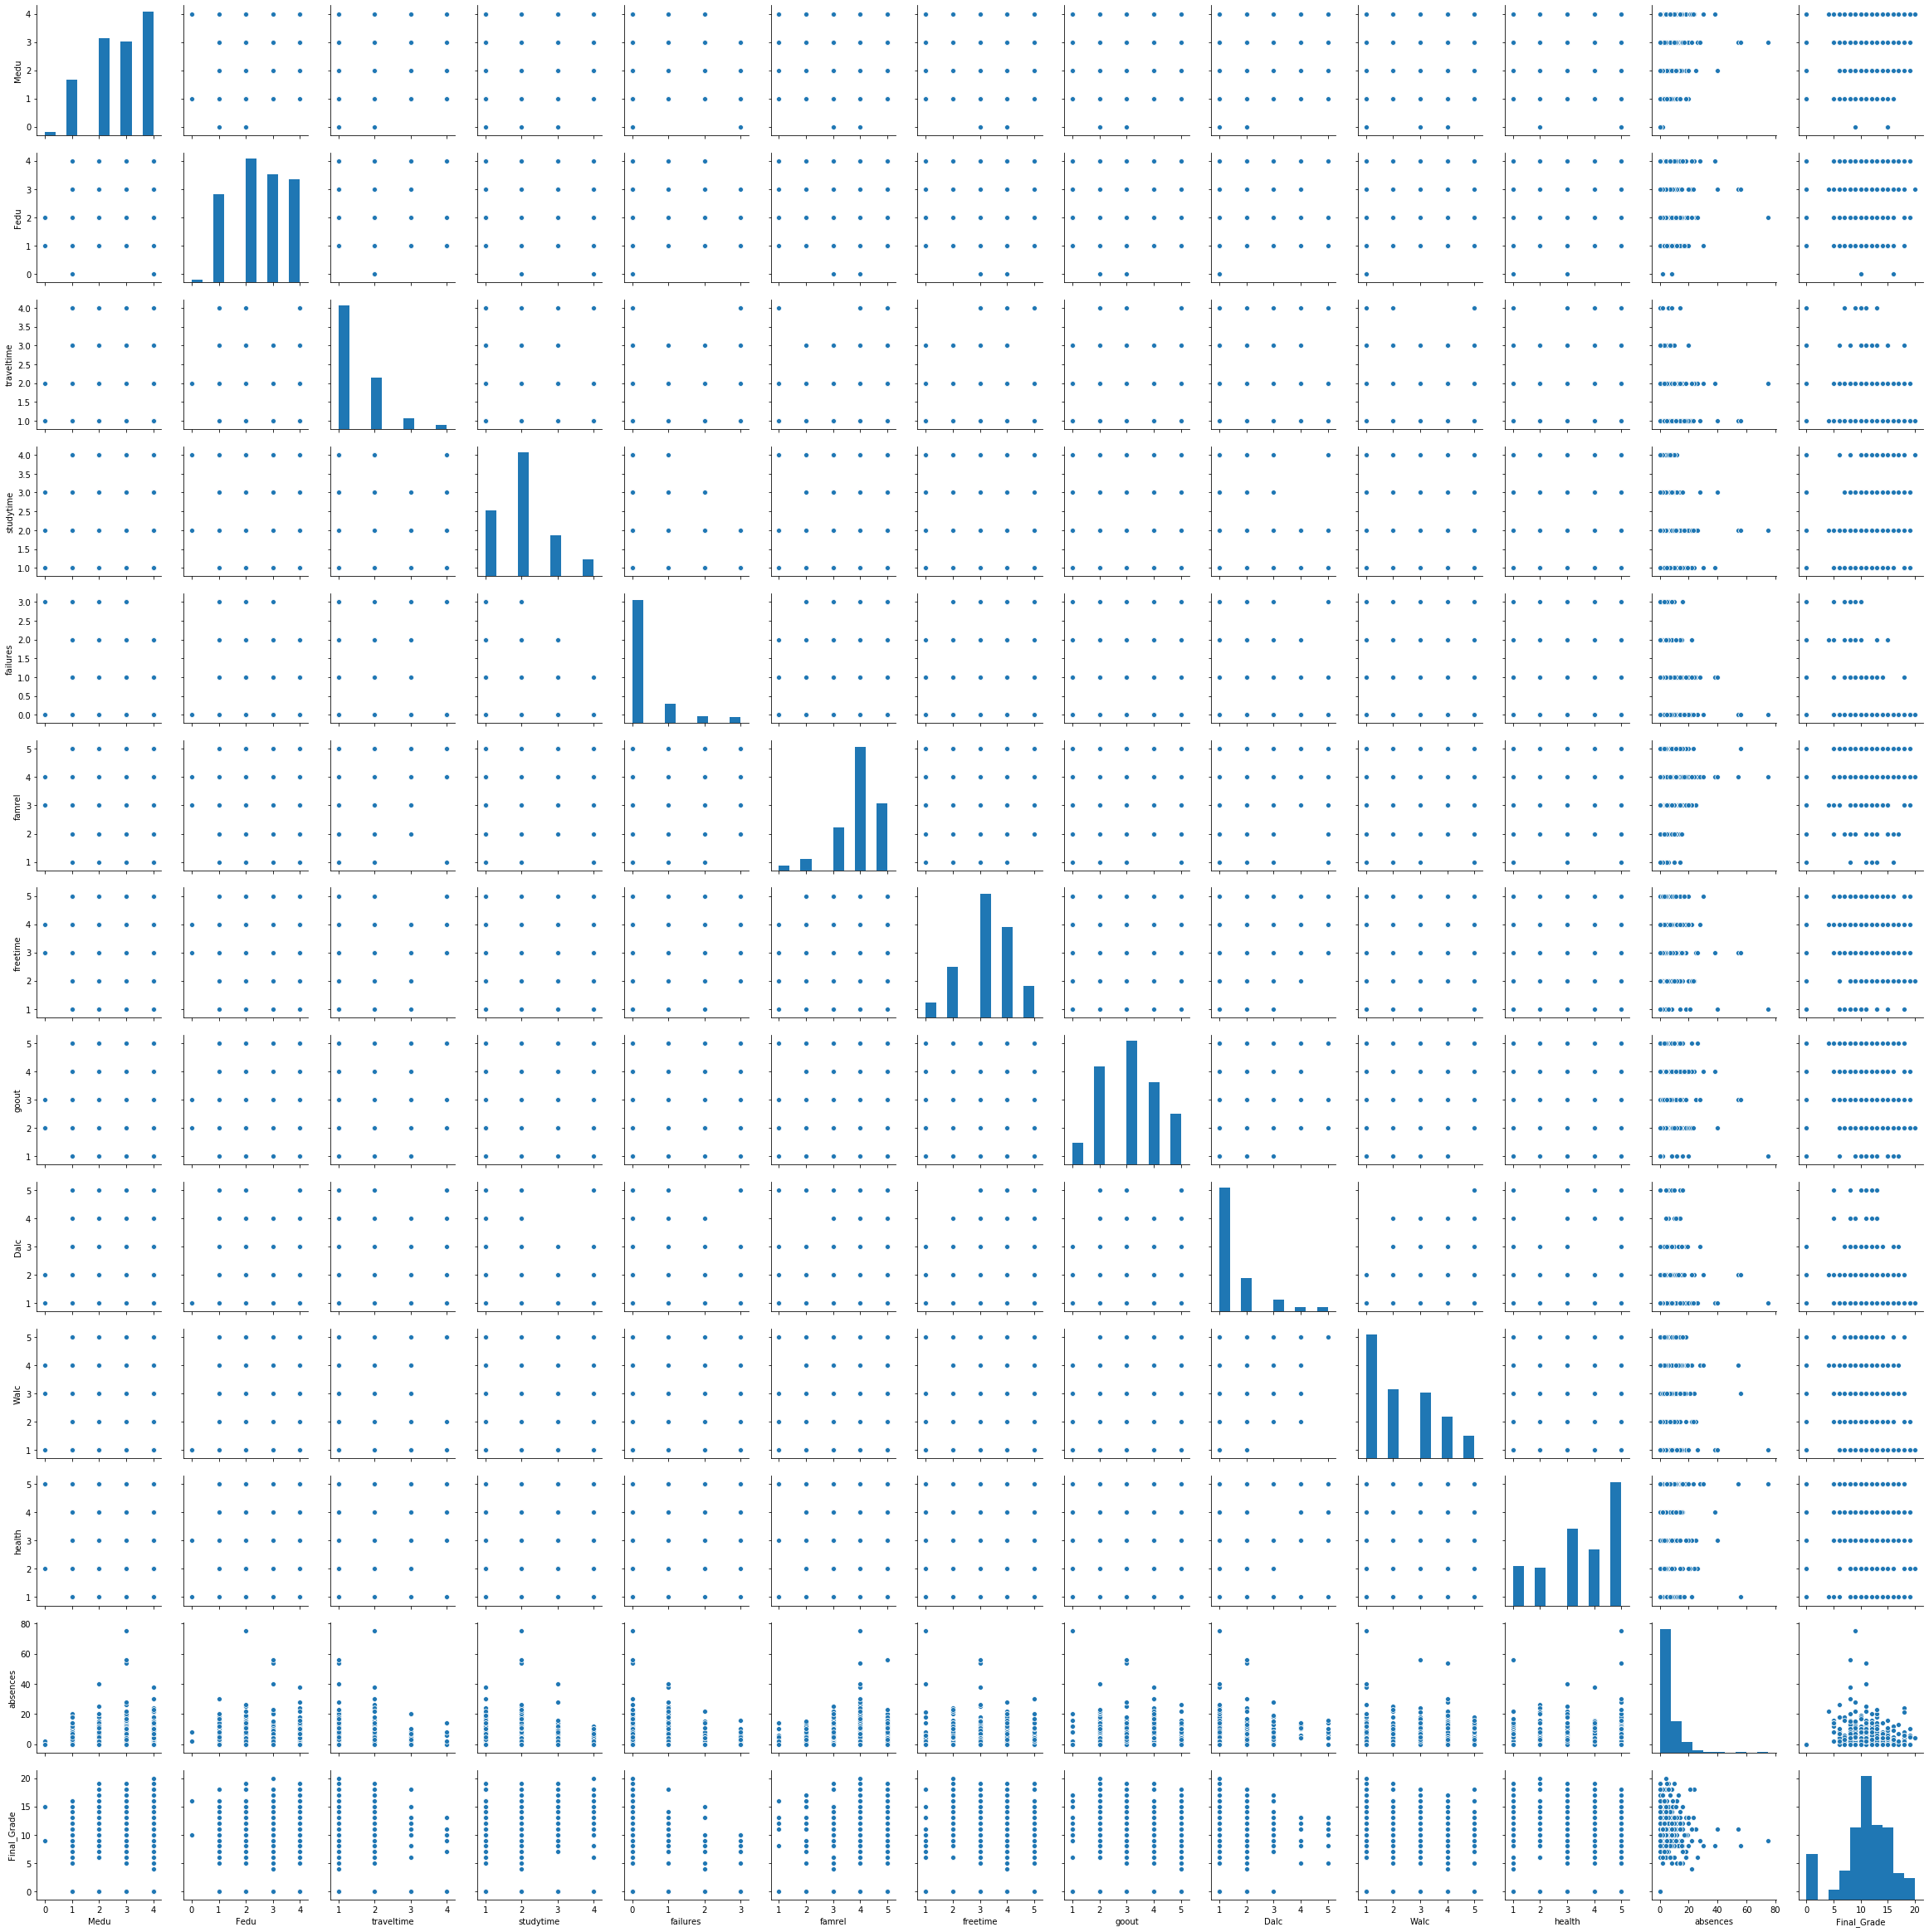

In [123]:
sns.pairplot(data)  

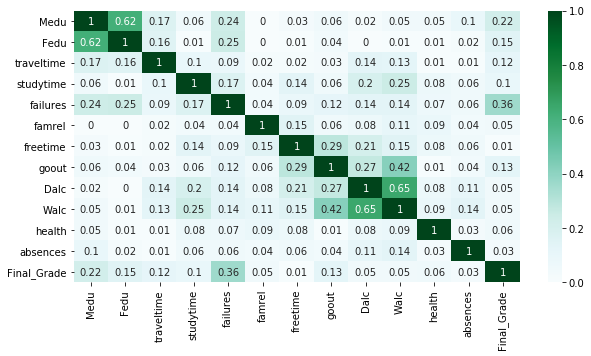

In [124]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

#### as we can see from the heatmap there is no high colerration between our numeric variables

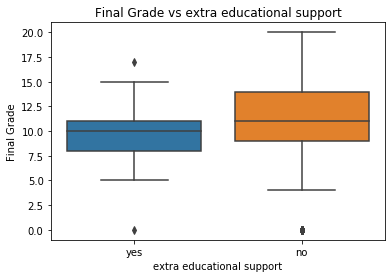

In [125]:
sns.boxplot(x=data.schoolsup,y=data.Final_Grade)
plt.xlabel("extra educational support")
plt.ylabel("Final Grade")
plt.title("Final Grade vs extra educational support")
plt.show()

#### As it can be seen from the plot, there is a slight difference between prices of two and four door cars. In order to learn whether the difference is statistically significant, we will conduct the t-test.

In [126]:
stats.ttest_ind(data.Final_Grade[data.schoolsup=="yes"],
               data.Final_Grade[data.schoolsup=="no"])

Ttest_indResult(statistic=-1.64686583783745, pvalue=0.10038496363910417)

#### As we can see from the results of t-test, final_grade is not significantly different for students who have extra educational support  and who have not as p-value is above the 5% significance level.

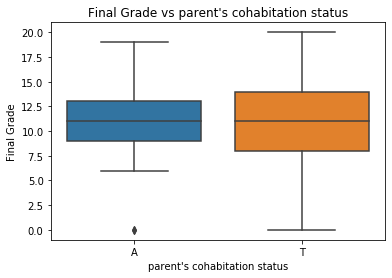

In [127]:
sns.boxplot(x=data.Pstatus,y=data.Final_Grade)
plt.xlabel("parent's cohabitation status")
plt.ylabel("Final Grade")
plt.title("Final Grade vs parent's cohabitation status")
plt.show()

In [128]:
stats.ttest_ind(data.Final_Grade[data.Pstatus=="A"],
               data.Final_Grade[data.Pstatus=="T"])

Ttest_indResult(statistic=1.1519230889779004, pvalue=0.2500529392639171)

In [129]:
#### As we can see from the results of t-test, final_grade is not significantly different for students who's parents live together or not as p-value is above the 5% significance level.

In [130]:
data_new=pd.get_dummies(data, drop_first=True)   

In [131]:
data_new.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,...,1,0,1,0,0,0,1,1,0,0
1,1,1,1,2,0,5,3,3,1,1,...,0,0,0,1,0,0,0,1,1,0
2,1,1,1,2,3,4,3,2,2,3,...,1,0,1,0,1,0,1,1,1,0
3,4,2,1,3,0,3,2,2,1,1,...,1,0,0,1,1,1,1,1,1,1
4,3,3,1,2,0,4,3,2,1,2,...,0,0,0,1,1,0,1,1,0,0


In [132]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 39 columns):
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
Final_Grade          395 non-null int64
school2_MS           395 non-null uint8
sex_M                395 non-null uint8
address_U            395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_T            395 non-null uint8
Mjob_health          395 non-null uint8
Mjob_other           395 non-null uint8
Mjob_services        395 non-null uint8
Mjob_teacher         395 non-null uint8
Fjob_health    

# Running and building the OLS model

In [133]:
Y=data_new["Final_Grade"]
X=data_new.drop("Final_Grade", axis=1)

In [134]:
#Splitting the data into train and test sets 0s are for train and 1s for test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=31)

In [135]:
X0=sm.add_constant(X0)

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [136]:
model_linear= sm.OLS(Y0,X0)

In [137]:
results=model_linear.fit()

In [138]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     2.521
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.06e-05
Time:                        01:45:15   Log-Likelihood:                -811.96
No. Observations:                 296   AIC:                             1702.
Df Residuals:                     257   BIC:                             1846.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.6386      2.834      2.343      0.020       1.059      12.219
Medu                  0.3775      0.375      1.005      0.316      -0.362       1.117
Fedu                  0.1077      0.312      0.346      0.730      -0.506       0.722
traveltime           -0.2053      0.387     -0.531      0.596      -0.967       0.556
studytime             0.6031      0.327      1.843      0.067      -0.041       1.248
failures             -1.3902      0.392     -3.543      0.000      -2.163      -0.617
famrel                0.1338      0.271      0.494      0.622      -0.400       0.668
freetime              0.2654      0.269      0.986      0.325      -0.265       0.795
goout                -0.8377      0.246     -3.408      0.001      -1.322      -0.354
Dalc                 -0.0993      0.396     -0.251      0.802      -0.879       0.680
Walc                  0.3317      0.285      1.162      0.246      -0.230       0.894
health               -0.1168      0.185     -0.630      0.529      -0.482       0.248
absences              0.0513      0.034      1.515      0.131      -0.015       0.118
school2_MS            0.6440      0.886      0.727      0.468      -1.101       2.389
sex_M                 0.6920      0.585      1.182      0.238      -0.460       1.844
address_U             1.8275      0.685      2.668      0.008       0.479       3.176
famsize_LE3           0.4695      0.570      0.824      0.411      -0.653       1.592
Pstatus_T            -0.0157      0.948     -0.017      0.987      -1.882       1.851
Mjob_health           1.1900      1.294      0.920      0.359      -1.358       3.738
Mjob_other           -0.4500      0.843     -0.534      0.594      -2.110       1.210
Mjob_services         0.4115      0.917      0.449      0.654      -1.394       2.217
Mjob_teacher         -1.4452      1.160     -1.246      0.214      -3.729       0.838
Fjob_health          -0.8255      1.625     -0.508      0.612      -4.026       2.375
Fjob_other           -1.5473      1.203     -1.287      0.199      -3.915       0.821
Fjob_services        -1.5848      1.235     -1.283      0.201      -4.017       0.848
Fjob_teacher         -0.2760      1.490     -0.185      0.853      -3.210       2.658
reason_home           0.1643      0.648      0.254      0.800      -1.112       1.441
reason_other          0.7219      0.971      0.743      0.458      -1.191       2.634
reason_reputation     0.5902      0.643      0.918      0.359      -0.676       1.856
guardian_mother       0.2843      0.626      0.454      0.650      -0.949       1.518
guardian_other       -0.1047      1.182     -0.089      0.930      -2.432       2.223
schoolsup_yes        -1.4388      0.766     -1.877      0.062      -2.948       0.071
famsup_yes           -0.5014      0.554     -0.904      0.367      -1.593

In [139]:
Y1_linear=results.predict(sm.add_constant(X1))
Y0_linear=results.predict(X0)

In [140]:
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.27157037900432823
R-squared Test: 0.1659849017364453


#### as we can see the overall model is not good so we can try to make it better using different methods

# second model

In [141]:
# as p-value of "guardian_mother","guardian_other" is high we can drop them
Y0_second=Y0
X0_second=X0.drop(["guardian_mother","guardian_other"], axis=1)

In [142]:
results_1= sm.OLS(Y0_second,X0_second).fit()

In [143]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.671
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           4.22e-06
Time:                        01:47:52   Log-Likelihood:                -812.13
No. Observations:                 296   AIC:                             1698.
Df Residuals:                     259   BIC:                             1835.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.0498      2.697      2.614      0.009       1.738      12.361
Medu                  0.4077      0.370      1.103      0.271      -0.320       1.135
Fedu                  0.0763      0.305      0.250      0.803      -0.525       0.677
traveltime           -0.2327      0.382     -0.610      0.543      -0.984       0.519
studytime             0.5865      0.324      1.810      0.071      -0.051       1.224
failures             -1.4322      0.368     -3.889      0.000      -2.157      -0.707
famrel                0.1294      0.267      0.485      0.628      -0.396       0.655
freetime              0.2605      0.268      0.971      0.332      -0.268       0.788
goout                -0.8279      0.244     -3.394      0.001      -1.308      -0.347
Dalc                 -0.1150      0.393     -0.293      0.770      -0.889       0.659
Walc                  0.3389      0.282      1.201      0.231      -0.217       0.895
health               -0.1124      0.183     -0.613      0.541      -0.474       0.249
absences              0.0503      0.033      1.520      0.130      -0.015       0.116
school2_MS            0.6020      0.880      0.684      0.494      -1.130       2.334
sex_M                 0.6640      0.581      1.143      0.254      -0.480       1.808
address_U             1.7759      0.674      2.634      0.009       0.448       3.104
famsize_LE3           0.4707      0.568      0.829      0.408      -0.647       1.589
Pstatus_T            -0.0706      0.938     -0.075      0.940      -1.919       1.777
Mjob_health           1.1011      1.279      0.861      0.390      -1.418       3.620
Mjob_other           -0.5176      0.830     -0.624      0.533      -2.152       1.117
Mjob_services         0.3631      0.909      0.399      0.690      -1.428       2.154
Mjob_teacher         -1.4578      1.151     -1.267      0.206      -3.724       0.808
Fjob_health          -0.8232      1.612     -0.511      0.610      -3.997       2.351
Fjob_other           -1.5014      1.195     -1.256      0.210      -3.855       0.853
Fjob_services        -1.5608      1.226     -1.273      0.204      -3.976       0.854
Fjob_teacher         -0.2502      1.479     -0.169      0.866      -3.163       2.662
reason_home           0.1375      0.643      0.214      0.831      -1.129       1.404
reason_other          0.7562      0.966      0.783      0.434      -1.146       2.658
reason_reputation     0.5756      0.639      0.901      0.368      -0.683       1.834
schoolsup_yes        -1.4323      0.762     -1.880      0.061      -2.933       0.068
famsup_yes           -0.5099      0.552     -0.923      0.357      -1.598       0.578
paid_yes              0.2362      0.549      0.430      0.667      -0.844       1.317
activities_yes       -0.0136      0.523     -0.026      0.979      -1.043

In [144]:
Y0_linear_2=results_1.predict(X0_second)
Y1_linear_2=results_1.predict(sm.add_constant(X1.drop(["guardian_mother","guardian_other"], axis=1)))

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [145]:
print("R-squared Train:",r2_score(Y0,Y0_linear_2))
print("R-squared Test:",r2_score(Y1,Y1_linear_2))

R-squared Train: 0.27074182196206453
R-squared Test: 0.17049656803136548


In [146]:
# as we can see R_2 of the test is higher

In [147]:
# adj. R_2 went up,we can drop more variables 
# as p-value of Pstatus_T is high let's drop it
Y0_third=Y0
X0_third=X0.drop(["guardian_mother","guardian_other","Pstatus_T"], axis=1)

In [148]:
results_2= sm.OLS(Y0_third,X0_third).fit()

In [149]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     2.758
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.49e-06
Time:                        01:48:03   Log-Likelihood:                -812.13
No. Observations:                 296   AIC:                             1696.
Df Residuals:                     260   BIC:                             1829.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.9802      2.529      2.760      0.006       2.000      11.960
Medu                  0.4106      0.367      1.119      0.264      -0.312       1.133
Fedu                  0.0769      0.304      0.253      0.801      -0.523       0.676
traveltime           -0.2322      0.381     -0.610      0.543      -0.982       0.518
studytime             0.5869      0.323      1.815      0.071      -0.050       1.224
failures             -1.4310      0.367     -3.897      0.000      -2.154      -0.708
famrel                0.1285      0.266      0.483      0.630      -0.396       0.653
freetime              0.2607      0.268      0.974      0.331      -0.266       0.788
goout                -0.8274      0.243     -3.399      0.001      -1.307      -0.348
Dalc                 -0.1149      0.392     -0.293      0.770      -0.888       0.658
Walc                  0.3400      0.281      1.209      0.228      -0.214       0.894
health               -0.1122      0.183     -0.613      0.541      -0.473       0.248
absences              0.0508      0.033      1.558      0.120      -0.013       0.115
school2_MS            0.6034      0.878      0.687      0.492      -1.125       2.332
sex_M                 0.6639      0.580      1.145      0.253      -0.478       1.806
address_U             1.7756      0.673      2.638      0.009       0.450       3.101
famsize_LE3           0.4765      0.562      0.848      0.397      -0.629       1.582
Mjob_health           1.1014      1.277      0.863      0.389      -1.413       3.616
Mjob_other           -0.5168      0.828     -0.624      0.533      -2.148       1.114
Mjob_services         0.3682      0.905      0.407      0.684      -1.414       2.151
Mjob_teacher         -1.4594      1.149     -1.271      0.205      -3.721       0.802
Fjob_health          -0.8249      1.609     -0.513      0.609      -3.993       2.343
Fjob_other           -1.5071      1.191     -1.266      0.207      -3.852       0.838
Fjob_services        -1.5683      1.220     -1.286      0.200      -3.971       0.834
Fjob_teacher         -0.2499      1.476     -0.169      0.866      -3.157       2.657
reason_home           0.1372      0.642      0.214      0.831      -1.126       1.401
reason_other          0.7513      0.962      0.781      0.435      -1.143       2.645
reason_reputation     0.5759      0.638      0.903      0.367      -0.680       1.832
schoolsup_yes        -1.4303      0.760     -1.882      0.061      -2.927       0.067
famsup_yes           -0.5113      0.551     -0.928      0.354      -1.596       0.574
paid_yes              0.2346      0.547      0.429      0.669      -0.843       1.312
activities_yes       -0.0199      0.515     -0.039      0.969      -1.034       0.994
nursery_yes          -0.1745      0.615     -0.284      0.777      -1.385

In [150]:
Y0_linear_3=results_2.predict(X0_third)
Y1_linear_3=results_2.predict(sm.add_constant(X1.drop(["guardian_mother","guardian_other","Pstatus_T"], axis=1)))

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [151]:
print("R-squared Train:",r2_score(Y0,Y0_linear_3))
print("R-squared Test:",r2_score(Y1,Y1_linear_3))

R-squared Train: 0.2707258802065249
R-squared Test: 0.1700430122915162


In [154]:
# let's continue dropping insignificant variables
Y0_4th=Y0
X0_4th=X0.drop(["guardian_mother","guardian_other","Pstatus_T","Fedu","famrel","nursery_yes","activities_yes","reason_home","reason_other","paid_yes"], axis=1)

In [155]:
results_3= sm.OLS(Y0_4th,X0_4th).fit()

In [156]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     3.481
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           5.81e-08
Time:                        01:51:11   Log-Likelihood:                -812.80
No. Observations:                 296   AIC:                             1684.
Df Residuals:                     267   BIC:                             1791.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.5264      2.304      3.267      0.001       2.991      12.062
Medu                  0.4375      0.313      1.399      0.163      -0.178       1.053
traveltime           -0.2611      0.373     -0.699      0.485      -0.996       0.474
studytime             0.5663      0.309      1.830      0.068      -0.043       1.175
failures             -1.4750      0.355     -4.153      0.000      -2.174      -0.776
freetime              0.2793      0.254      1.099      0.273      -0.221       0.780
goout                -0.8353      0.238     -3.510      0.001      -1.304      -0.367
Dalc                 -0.0779      0.382     -0.204      0.838      -0.830       0.674
Walc                  0.3494      0.273      1.280      0.202      -0.188       0.887
health               -0.1138      0.177     -0.641      0.522      -0.463       0.235
absences              0.0512      0.031      1.624      0.106      -0.011       0.113
school2_MS            0.6577      0.850      0.773      0.440      -1.017       2.332
sex_M                 0.5979      0.554      1.079      0.282      -0.494       1.689
address_U             1.7368      0.654      2.655      0.008       0.449       3.025
famsize_LE3           0.3774      0.542      0.697      0.487      -0.689       1.444
Mjob_health           1.2065      1.222      0.987      0.324      -1.199       3.612
Mjob_other           -0.4877      0.808     -0.604      0.547      -2.079       1.103
Mjob_services         0.4437      0.882      0.503      0.615      -1.294       2.181
Mjob_teacher         -1.4525      1.116     -1.301      0.194      -3.650       0.745
Fjob_health          -0.5955      1.555     -0.383      0.702      -3.657       2.466
Fjob_other           -1.4695      1.162     -1.264      0.207      -3.758       0.819
Fjob_services        -1.5356      1.197     -1.283      0.201      -3.892       0.821
Fjob_teacher         -0.1209      1.428     -0.085      0.933      -2.933       2.691
reason_reputation     0.4104      0.549      0.748      0.455      -0.670       1.491
schoolsup_yes        -1.4519      0.748     -1.941      0.053      -2.925       0.021
famsup_yes           -0.4702      0.520     -0.905      0.366      -1.493       0.553
higher_yes            2.3485      1.241      1.892      0.060      -0.095       4.792
internet_yes          0.6201      0.657      0.943      0.346      -0.674       1.914
romantic_yes         -0.8856      0.529     -1.674      0.095      -1.927       0.156
==============================================================================
Omnibus:                       29.600   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.146
Skew:                          -0.764   Prob(JB):                     1.42e-08
Kurtosis:      

In [158]:
Y0_linear_4=results_3.predict(X0_4th)
Y1_linear_4=results_3.predict(sm.add_constant(X1.drop(["guardian_mother","guardian_other","Pstatus_T","Fedu","famrel","nursery_yes","activities_yes","reason_home","reason_other","paid_yes"], axis=1)))

In [159]:
print("R-squared Train:",r2_score(Y0,Y0_linear_4))
print("R-squared Test:",r2_score(Y1,Y1_linear_4))

R-squared Train: 0.26742126064552874
R-squared Test: 0.16027945507981423


In [160]:
# also we can transform Dalc and Walc variables , let's start from scratch

data["Alcohol"]=data.Dalc+data.Walc

In [161]:
data["Nonstudy"]=data.freetime+data.goout+data.traveltime

In [162]:
data.drop(["Dalc","Walc","freetime","goout","traveltime"],axis=1,inplace=True)

In [163]:
data_new=pd.get_dummies(data,drop_first=True)

In [166]:
Yn=data_new["Final_Grade"]
Xn=data_new.drop("Final_Grade", axis=1)

In [168]:
X0, X1, Y0, Y1 = train_test_split(Xn, Yn, test_size=0.25, random_state=31)

In [169]:
X0=sm.add_constant(X0)

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [175]:
model_linear_tr= sm.OLS(Y0,X0)

In [176]:
results_tr=model_linear.fit()

In [177]:
results_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     2.476
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.70e-05
Time:                        02:07:40   Log-Likelihood:                -816.28
No. Observations:                 296   AIC:                             1705.
Df Residuals:                     260   BIC:                             1837.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.5237      2.794      2.693      0.008       2.023      13.025
Medu                  0.3126      0.373      0.839      0.402      -0.421       1.046
Fedu                  0.1265      0.311      0.407      0.684      -0.486       0.739
studytime             0.5107      0.325      1.570      0.118      -0.130       1.151
failures             -1.3731      0.395     -3.478      0.001      -2.151      -0.596
famrel                0.1761      0.272      0.647      0.518      -0.359       0.712
health               -0.0918      0.187     -0.492      0.623      -0.459       0.275
absences              0.0488      0.034      1.437      0.152      -0.018       0.116
Alcohol               0.0888      0.154      0.575      0.566      -0.215       0.393
Nonstudy             -0.3127      0.148     -2.107      0.036      -0.605      -0.020
school2_MS            0.7184      0.891      0.806      0.421      -1.036       2.473
sex_M                 0.9023      0.585      1.542      0.124      -0.250       2.054
address_U             1.7158      0.654      2.624      0.009       0.428       3.003
famsize_LE3           0.5219      0.573      0.911      0.363      -0.607       1.650
Pstatus_T            -0.0235      0.956     -0.025      0.980      -1.906       1.859
Mjob_health           1.4481      1.272      1.139      0.256      -1.056       3.953
Mjob_other           -0.4035      0.836     -0.483      0.630      -2.050       1.243
Mjob_services         0.5668      0.911      0.622      0.534      -1.226       2.360
Mjob_teacher         -1.0905      1.151     -0.947      0.344      -3.357       1.176
Fjob_health          -1.2665      1.623     -0.780      0.436      -4.463       1.929
Fjob_other           -1.6030      1.192     -1.345      0.180      -3.950       0.744
Fjob_services        -1.7438      1.232     -1.415      0.158      -4.170       0.682
Fjob_teacher         -0.4834      1.488     -0.325      0.745      -3.413       2.446
reason_home           0.0029      0.651      0.004      0.996      -1.279       1.285
reason_other          0.8153      0.975      0.837      0.404      -1.104       2.734
reason_reputation     0.6214      0.648      0.959      0.338      -0.654       1.897
guardian_mother       0.1425      0.623      0.229      0.819      -1.085       1.370
guardian_other       -0.1903      1.187     -0.160      0.873      -2.528       2.147
schoolsup_yes        -1.4475      0.768     -1.886      0.060      -2.959       0.064
famsup_yes           -0.4503      0.557     -0.808      0.420      -1.548       0.647
paid_yes              0.2429      0.556      0.437      0.663      -0.852       1.338
activities_yes        0.0357      0.533      0.067      0.947      -1.014       1.085
nursery_yes          -0.2348      0.634     -0.370      0.711      -1.484

In [178]:
Y1_linear=results.predict(sm.add_constant(X1))
Y0_linear=results.predict(X0)

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [179]:
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.24999685540579275
R-squared Test: 0.16323960257954406


In [180]:
#### from my point of view the best model is the second one which I have highlited (as its ability to predict is higher, R_2 on test is higher)

# Checking LR assumptions using residual analysis (visual evidence)

In [181]:
#residuals of the model
residuals=results_1.resid
predicted_values=results_1.predict()

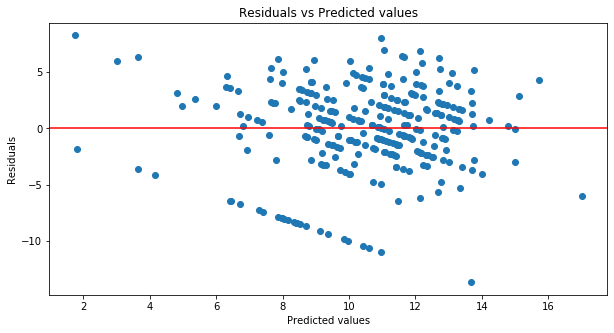

In [182]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [183]:
# The residuals vs fitted values plot pattern is random and we cannot see an increasing/decreasing variance. but the part of it is shexvats

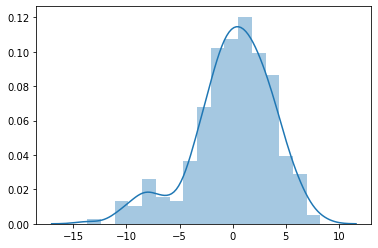

In [184]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

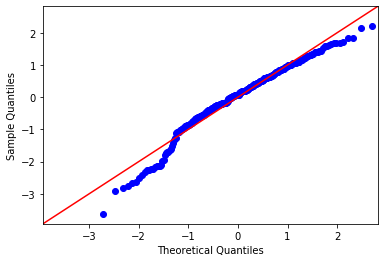

In [185]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

#### The residuals distribution plot shows that the distribution is nearly bell-shaped, so based on the plot only we can say that the normality assumption is held. QQ-plot shows that the there are many outliers

# Diagnostic tests for LINE assumptions

In [186]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results_tr)
print(list(zip(rnames, rainbow)))

[('fstat', 0.9809231722295553), ('p-value', 0.5464782496909679)]


In [187]:
#### the result shows that the Linearity assumption is held, since we have a large p-value.

In [189]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results_tr.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 48.32536866643355), ('p-value', 0.06632456317400917), ('f-value', 1.449435701257454), ('f p-value', 0.05609672565604246)]


In [190]:
#We fail to reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is hold.

In [191]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9638932943344116), ('p-value', 9.768806421561749e-07)]


In [192]:
#Test confirms that the data was not drawn from a normal distribution.

In [194]:
#defining colnames 
var=data_new.columns.tolist()

In [195]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(data_new[var].values, i) for i in range(0,len(var))]
print(vif)

[20.989325282625742, 12.983503962077336, 8.72527460437254, 1.741452117861619, 21.03288745119816, 8.364470508229251, 1.8396468471948624, 7.999187207854274, 7.2919661416801445, 24.195571184360986, 1.4355736734650804, 2.765003366180683, 5.483166650003712, 1.5917473618220128, 9.861622627766272, 2.456810334056969, 4.179157767442341, 3.8409015002258395, 3.6257104579982067, 2.0513448996239867, 11.279971748187684, 6.2506786847722555, 2.6248534351463273, 1.9575660823172552, 1.3955645702924504, 2.056419952463721, 4.445363874567838, 1.6588399658250306, 1.2800334779035067, 3.2337425814110756, 2.4285126796059604, 2.3541121931779374, 5.431037061803746, 21.789644271593033, 7.359880975237015, 1.7282529164020386]


In [196]:
#printing vif values together with variable names
for i in range(0,len(var)):
    print(var[i],":",vif[i])

Medu : 20.989325282625742
Fedu : 12.983503962077336
studytime : 8.72527460437254
failures : 1.741452117861619
famrel : 21.03288745119816
health : 8.364470508229251
absences : 1.8396468471948624
Final_Grade : 7.999187207854274
Alcohol : 7.2919661416801445
Nonstudy : 24.195571184360986
school2_MS : 1.4355736734650804
sex_M : 2.765003366180683
address_U : 5.483166650003712
famsize_LE3 : 1.5917473618220128
Pstatus_T : 9.861622627766272
Mjob_health : 2.456810334056969
Mjob_other : 4.179157767442341
Mjob_services : 3.8409015002258395
Mjob_teacher : 3.6257104579982067
Fjob_health : 2.0513448996239867
Fjob_other : 11.279971748187684
Fjob_services : 6.2506786847722555
Fjob_teacher : 2.6248534351463273
reason_home : 1.9575660823172552
reason_other : 1.3955645702924504
reason_reputation : 2.056419952463721
guardian_mother : 4.445363874567838
guardian_other : 1.6588399658250306
schoolsup_yes : 1.2800334779035067
famsup_yes : 3.2337425814110756
paid_yes : 2.4285126796059604
activities_yes : 2.35411

### As we see for some variables we have vary big VIF values, so the there are highly correlated variables in the model. We should drop the correlated variables one by one.

## as the model is not good, I want to drop 0 grades to make final_ grades normally distributed and drop many variables

In [251]:
data=pd.read_excel("Student_data (1).xlsx")

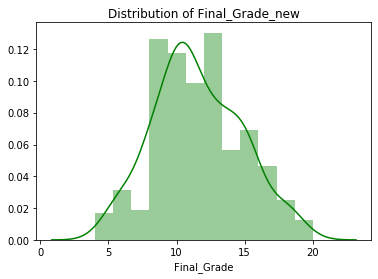

In [252]:
indexNames = data[ data['Final_Grade'] == 0 ].index
data.drop(indexNames , inplace=True)
sns.distplot(np.data.Final_Grade,color="green")
plt.title("Distribution of Final_Grade_new")
plt.show()

#### more or less normally distributed

In [253]:
data.drop(["StudentID","age","Medu","Fedu","famrel","Pstatus","Dalc","Walc","Mjob","Fjob","higher","reason","guardian","nursery","paid","romantic"],axis=1,inplace=True)

In [254]:
data.head()

,school2,sex,address,famsize,traveltime,studytime,failures,schoolsup,famsup,activities,internet,freetime,goout,health,absences,Final_Grade
0,GP,F,U,GT3,2,2,0,yes,no,no,no,3,4,3,6,6
1,GP,F,U,GT3,1,2,0,no,yes,no,yes,3,3,3,4,6
2,GP,F,U,LE3,1,2,3,yes,no,no,yes,3,2,3,10,10
3,GP,F,U,GT3,1,3,0,no,yes,yes,yes,2,2,5,2,15
4,GP,F,U,GT3,1,2,0,no,yes,no,no,3,2,5,4,10


In [255]:
data_new=pd.get_dummies(data,drop_first=True)

In [256]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 16 columns):
traveltime        357 non-null int64
studytime         357 non-null int64
failures          357 non-null int64
freetime          357 non-null int64
goout             357 non-null int64
health            357 non-null int64
absences          357 non-null int64
Final_Grade       357 non-null int64
school2_MS        357 non-null uint8
sex_M             357 non-null uint8
address_U         357 non-null uint8
famsize_LE3       357 non-null uint8
schoolsup_yes     357 non-null uint8
famsup_yes        357 non-null uint8
activities_yes    357 non-null uint8
internet_yes      357 non-null uint8
dtypes: int64(8), uint8(8)
memory usage: 27.9 KB


In [288]:
data_numeric = data_new.select_dtypes(exclude=["object"])

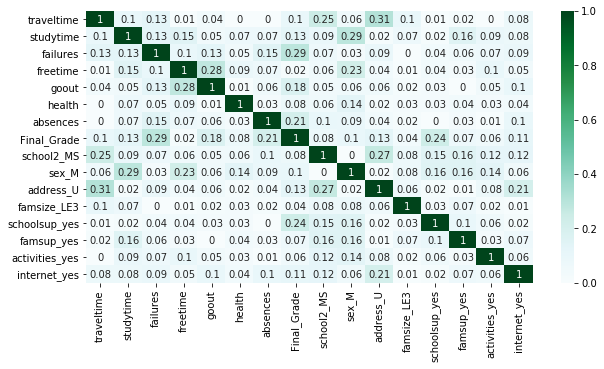

In [289]:
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "BuGn")

In [257]:
Y=data_new["Final_Grade"]
X=data_new.drop("Final_Grade", axis=1)

In [258]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=31)

In [259]:
X0=sm.add_constant(X0)

In [260]:
model_linear0= sm.OLS(Y0,X0)

In [261]:
results=model_linear0.fit()

In [262]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     6.344
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.23e-11
Time:                        03:15:51   Log-Likelihood:                -647.96
No. Observations:                 267   AIC:                             1328.
Df Residuals:                     251   BIC:                             1385.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.3281      1.248      9.076      0.000       8.870      13.786
traveltime        -0.1246      0.262     -0.475      0.635      -0.641       0.392
studytime          0.4714      0.234      2.012      0.045       0.010       0.933
failures          -0.7912      0.261     -3.029      0.003      -1.306      -0.277
freetime           0.0947      0.188      0.504      0.615      -0.276       0.465
goout             -0.3924      0.164     -2.397      0.017      -0.715      -0.070
health            -0.1267      0.127     -1.000      0.318      -0.376       0.123
absences          -0.0801      0.024     -3.352      0.001      -0.127      -0.033
school2_MS        -0.7877      0.605     -1.302      0.194      -1.979       0.404
sex_M              0.3942      0.390      1.012      0.313      -0.373       1.162
address_U          1.1366      0.475      2.392      0.017       0.201       2.072
famsize_LE3        0.3812      0.386      0.986      0.325      -0.380       1.142
schoolsup_yes     -2.2170      0.518     -4.279      0.000      -3.238      -1.197
famsup_yes        -0.6945      0.369     -1.883      0.061      -1.421       0.032
activities_yes     0.6417      0.363      1.770      0.078      -0.072       1.356
internet_yes       0.8014      0.471      1.703      0.090      -0.126       1.728
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.332
Skew:                           0.163   Prob(JB):                        0.514
Kurtosis:                       2.885   Cond. No.                         77.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
#Let's see the significant and not significant variables
results.pvalues[results.pvalues<0.05]

const            3.388591e-17
studytime        4.524272e-02
failures         2.711703e-03
goout            1.724569e-02
absences         9.253744e-04
address_U        1.749375e-02
schoolsup_yes    2.676326e-05
dtype: float64

In [264]:
results.pvalues[results.pvalues>0.05]

traveltime        0.635142
freetime          0.614823
health            0.318179
school2_MS        0.194173
sex_M             0.312705
famsize_LE3       0.324872
famsup_yes        0.060834
activities_yes    0.077998
internet_yes      0.089866
dtype: float64

In [265]:
#predicting for train and test data
Y1_linear=results.predict(sm.add_constant(X1))
Y0_linear=results.predict(X0)

In [266]:
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.27488851128605796
R-squared Test: 0.0882673688478317


In [267]:
# this one is not good for prediction, let's check assumptions

# Checking LR assumptions using residual analysis (visual evidence)

In [268]:
residuals=results.resid
predicted_values=results.predict()

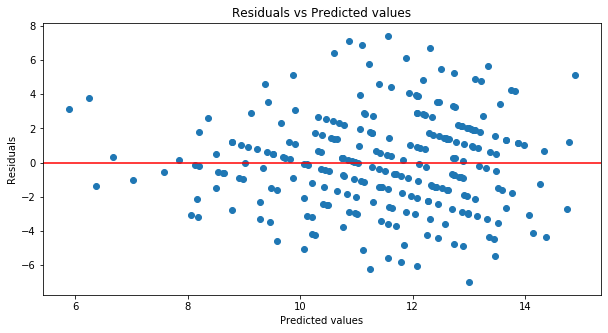

In [269]:
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

#### The residuals vs fitted values plot pattern is random and we cannot see an increasing/decreasing variance

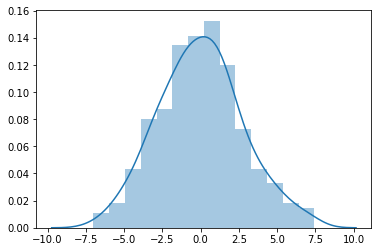

In [270]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

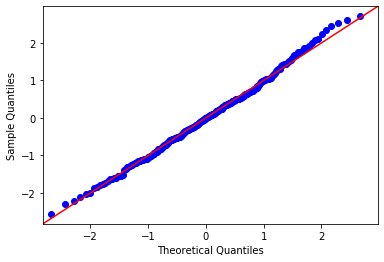

In [271]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

#### The residuals distribution plot shows that the distribution is approximately bell-shaped, so based on the plot only we can say that the normality assumption is held. QQ-plot shows that the there are several outliers, but overall the dots are along the line.

# Diagnostic tests for LINE assumptions

In [273]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 0.8462332334679467), ('p-value', 0.8254803308057989)]


In [274]:
# we fail to reject the null hypothesis, that is good )))

In [275]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 13.891301189282325), ('p-value', 0.5337886083437002), ('f-value', 0.9183713334476213), ('f p-value', 0.5442110196284056)]


In [276]:
#We fail to reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is hold.

In [277]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9955852627754211), ('p-value', 0.6493658423423767)]


In [278]:
# Test confirms that the data was drawn from a normal distribution.

In [280]:
#defining colnames 
var=data_new.columns.tolist()

In [282]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(data_new[var].values, i) for i in range(0,len(var))]
print(vif)

[5.616639168170754, 7.48050858030148, 1.3315364637569072, 12.450006942670328, 9.70773083445815, 6.776955691854744, 1.6902682885368598, 12.898591263808479, 1.3775728684890862, 2.448768976629456, 5.410069329527582, 1.4855807283322324, 1.2590552041609835, 2.8094004557702585, 2.206200809906316, 6.7992055604047765]


In [283]:
#printing vif values together with variable names
for i in range(0,len(var)):
    print(var[i],":",vif[i])

traveltime : 5.616639168170754
studytime : 7.48050858030148
failures : 1.3315364637569072
freetime : 12.450006942670328
goout : 9.70773083445815
health : 6.776955691854744
absences : 1.6902682885368598
Final_Grade : 12.898591263808479
school2_MS : 1.3775728684890862
sex_M : 2.448768976629456
address_U : 5.410069329527582
famsize_LE3 : 1.4855807283322324
schoolsup_yes : 1.2590552041609835
famsup_yes : 2.8094004557702585
activities_yes : 2.206200809906316
internet_yes : 6.7992055604047765


In [284]:
# As we see for some variables we have big VIF values, so there are correlated variables in the model.

In [ ]:
# this model passes diagnostics best, so I choose this one.


# Interpretation of the results of Linear Regression

#### R-squared and F-statistics: As Prob (F-statistic) shows our model is statistically significant at 5% significance level, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is quite small number and it shows that 27.5% of variance in final grades is explained by the variables included in the model.

#### Adj. R-squared: As summary shows it's 23.2% and it is quite close to R-squared, which means that almost all variables included in the model have statistically significant relationship with final grades. 

#### Statistically significant variables: As p-values of t-statistics show, not all variables included in the model are statistically significant at 5% sig. level (p<=0.05). 
significant
const            3.388591e-17
studytime        4.524272e-02
failures         2.711703e-03
goout            1.724569e-02
absences         9.253744e-04
address_U        1.749375e-02
schoolsup_yes    2.676326e-05
non-significant
traveltime        0.635142
freetime          0.614823
health            0.318179
school2_MS        0.194173
sex_M             0.312705
famsize_LE3       0.324872
famsup_yes        0.060834
activities_yes    0.077998
internet_yes      0.089866

#### Coefficients (continous variable): Let's interpret for failures. For each unit increase in failures we will experience on average about 0.7912 unit decrease in mean final grade, other things constant.  (sorry for interpreting just one variable, thank you for your understanding)

#### Coefficients (categorical variable): students who live in urban areas are expected to get on average 1.1366 point higher in mean final grade compared to students who live in urban areas, other things constant.

## Final Model

#### Final_grade=11,3281-0,1246*traveltime+0,4714*studytime-0,7912*failures+0,0947*freetime-0,3924*goout-0,1267*health-0,0801*absences-0,7877*school2_MS+0,3942*sex_M+1,1366*address_U+0,3812*famsize_LE3-2,2170*schoolsup_yes-0,6945*famsup_yes+0,6417*activities_yes+0,8014*internet_yes


In [287]:
# this model is more descriptive, it is not predictive 